## Logistic Regression on XOR dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression

#### Generate XOR data

In [2]:
def generate_XOR(std, number_of_points):
    data1 = np.random.multivariate_normal([0, 0], [[std, 0], [0, std]], number_of_points)
    labels1 = np.zeros(data1.shape[0])
    data2 = np.random.multivariate_normal([0, 1], [[std, 0], [0, std]], number_of_points)
    labels2 = np.ones(data2.shape[0])
    data3 = np.random.multivariate_normal([1, 0], [[std, 0], [0, std]], number_of_points)
    labels3 = np.ones(data3.shape[0])
    data4 = np.random.multivariate_normal([1, 1], [[std, 0], [0, std]], number_of_points)
    labels4 = np.zeros(data4.shape[0])
    X = np.concatenate((data1, data2, data3, data4))
    y = np.concatenate((labels1, labels2, labels3, labels4))

    return X, y

number_of_points = 1000
std = 0.0075

X, y = generate_XOR(std, number_of_points)

#### Split into a training and test set

In [3]:
indices = np.arange(0, X.shape[0])
np.random.shuffle(indices)

training_proportion = 0.8
X_train = X[indices[:int(4 * number_of_points * training_proportion)]]
y_train = y[indices[:int(4 * number_of_points * training_proportion)]]

X_test = X[indices[int(4 * number_of_points * training_proportion):]]
y_test = y[indices[int(4 * number_of_points * training_proportion):]]

#### Train a Linear and Quadratic logistic regressor

In [4]:
lr_linear = LogisticRegression('linear')

lr_linear.fit(X, y)
y_hat = lr_linear.predict(X_test)
print("Linear accuracy: %.2f" % lr_linear.accuracy(y_test, y_hat))

lr_quadratic = LogisticRegression('quadratic')

lr_quadratic.fit(X, y)
y_hat = lr_quadratic.predict(X_test)
print("Quadratic accuracy: %.2f" % lr_quadratic.accuracy(y_test, y_hat))

Linear accuracy: 0.51
Quadratic accuracy: 1.00


#### Plot the decision boundaries for each classifier with the test data points

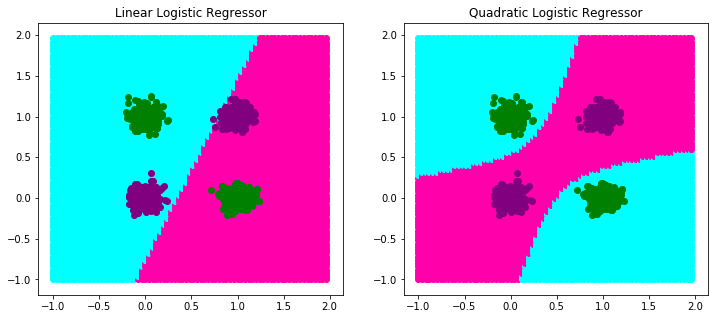

In [5]:
%matplotlib inline
db_linear_x, db_linear_y = lr_linear.decision_boundary([-1, 2], [-1, 2], 75)
db_quadratic_x, db_quadratic_y = lr_quadratic.decision_boundary([-1, 2], [-1, 2], 75)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#FF00AA', 'cyan']
for i, point in enumerate(db_linear_x):
    ax[0].scatter(point[0], point[1], color=colors[int(db_linear_y[i])])
colors = ['purple', 'green']
for i, point in enumerate(X_test):
    ax[0].scatter(point[0], point[1], color=colors[int(y_test[i])])
colors = ['#FF00AA', 'cyan']
for i, point in enumerate(db_quadratic_x):
    ax[1].scatter(point[0], point[1], color=colors[int(db_quadratic_y[i])])
colors = ['purple', 'green']
for i, point in enumerate(X_test):
    ax[1].scatter(point[0], point[1], color=colors[int(y_test[i])])

ax[0].set_title("Linear Logistic Regressor")
ax[1].set_title("Quadratic Logistic Regressor")
plt.show()
